## King County House Price Prediction

The dataset consist of price of houses in King County, Washington. The house price are recorded along with some other attributes like- area, number of bedrooms,number of bathrooms etc

Description of each Feature

id: Unique ID for each home sold

date: Date of the home sale

price: Price of each home sold

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the apartments interior living space

sqft_lot: Square footage of the land space

floors: Number of floors

waterfront: - A variable for whether the apartment was overlooking the waterfront or not

view: An index of how good the view of the property was

condition: - An index on the condition of the apartment,

grade: An index on grade og the appartment with 13 being highest and 1 being lowest.

sqft_above: The square footage of the interior housing space that is above ground level

sqft_basement: The square footage of the interior housing space that is below ground level

yr_built: The year the house was initially built

yr_renovated: The year of the house’s last renovation

zipcode: What zipcode area the house is in

lat: Lattitude

long: Longitude

sqft_living15: according to 2015 data,the square footage of the apartments interior living space

sqft_lot15: according to 2015 data, Square footage of the land space neighbors

In [71]:
#Importing the necessary Libraries
import pandas as pd                                     #Pandas module mainly works with the tabular data             
import numpy as np                                      #NumPy module works with the numerical data
import seaborn as sns
import matplotlib.pyplot as plt                         #plotting libraries to plot the necessary graphs for EDA
import plotly.express as px                             #plotting libraries to plot the necessary graphs for EDA
import sklearn                                          #importing machine learning libraries
import statsmodels.api as stm   
from sklearn import linear_model
from sklearn.model_selection import cross_val_score     #for cross validation score calculation                       
from sklearn.tree import DecisionTreeRegressor          #for regression using decision tree
from sklearn.metrics import r2_score                    #to calculate R-squared value
from sklearn.model_selection import train_test_split    #for doing test & train split of data

In [72]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


### Objective : 
To predict the price of the house based on the vaious parameters

In [39]:
df=pd.read_excel('house_price.xlsx')
df.shape

(9760, 22)

### Initial Hypothesis And Assumptions

Let us do some EDA by plotting the graphs and understanding the variation in price with repect to the variables

### 1.EDA

In [40]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
df.drop(['Unnamed: 0', 'id'],axis=1, inplace=True)

In [42]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
numericals = [feature for feature in df.columns if df[feature].dtypes!='object']
print('No.of numerical variables = ', len(numericals))

No.of numerical variables =  20


In [44]:
df[numericals].head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [86]:
df['date'] = df['date'].astype(str)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9760 non-null   object 
 1   price          9760 non-null   int64  
 2   bedrooms       9760 non-null   int64  
 3   bathrooms      9760 non-null   float64
 4   sqft_living    9760 non-null   int64  
 5   sqft_lot       9760 non-null   int64  
 6   floors         9760 non-null   float64
 7   waterfront     9760 non-null   int64  
 8   view           9760 non-null   int64  
 9   condition      9760 non-null   int64  
 10  grade          9760 non-null   int64  
 11  sqft_above     9760 non-null   int64  
 12  sqft_basement  9760 non-null   int64  
 13  yr_built       9760 non-null   int64  
 14  yr_renovated   9760 non-null   int64  
 15  zipcode        9760 non-null   int64  
 16  lat            9760 non-null   float64
 17  long           9760 non-null   float64
 18  sqft_liv

In [47]:
df[numericals].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.760000e+03,9760.000000,9760.000000,9760.000000,9.760000e+03,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000
mean,5.336262e+05,3.362295,2.061450,2053.001127,1.612110e+04,1.431045,0.007992,0.239447,3.444980,7.594980,1749.173770,303.827357,1967.263320,92.054918,98078.042418,47.559791,-122.214914,1974.279303,13429.801127
std,3.789003e+05,0.914689,0.766773,912.872610,4.547910e+04,0.511282,0.089044,0.768088,0.665676,1.169074,811.925705,451.122461,27.974058,418.747258,54.007463,0.140148,0.139009,672.406364,27589.889743
min,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.439750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.462100,-122.326000,1490.000000,5425.000000
50%,4.450000e+05,3.000000,2.000000,1890.000000,7.910000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7847.500000
75%,6.390000e+05,4.000000,2.500000,2500.000000,1.114700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679325,-122.127000,2340.000000,10375.250000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


### Date-Time Variables

Here in dataset we have 2 year variables. We have to extract the information from this like no.of years or no.of days

In [48]:
# list of variables that contain year features
years_feature = [feature for feature in numericals if 'yr' in feature]
years_feature

['yr_built', 'yr_renovated']

In [49]:
# Understanding the year feature
for feature in years_feature:
    print(feature,df[feature].unique())

yr_built [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
yr_renovated [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964]


year renovated = signifies that the house has not been renovated

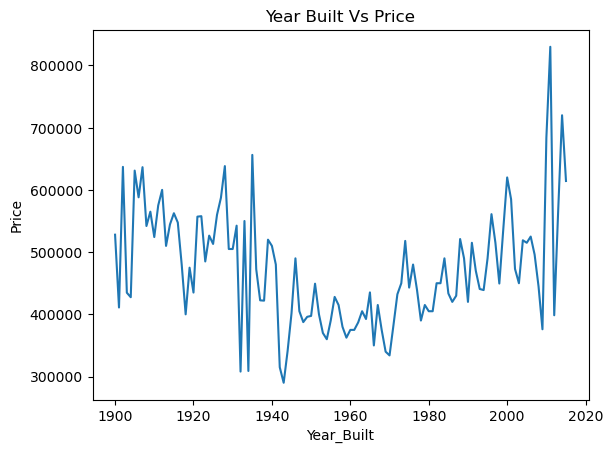

In [50]:
# Examining Datetime feature wit respect to price
# Understanding whether there is a relationship between Year the house is built and Price 

df.groupby('yr_built')['price'].median().plot()  #plot of year built vs price of house grouped by the year
plt.xlabel("Year_Built")
plt.ylabel("Price")
plt.title("Year Built Vs Price")
plt.show()

The above graph shows trend of house price across the years

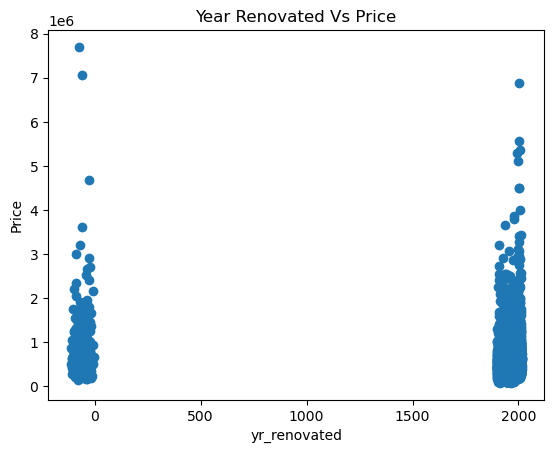

In [51]:
for feature in years_feature:
    if feature!='yr_built':
        data=df.copy() #creating a copy of our dataset
        data[feature] = data['yr_built']-data[feature]
        
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel("Price")
        plt.title("Year Renovated Vs Price")
        plt.show()

Here we can see if house is recently renovated price of house is high

#### Numerical variables are of two types:

1.Continous


2.Discrete

We separate the continous and discrete variables for further exploration.

In [52]:
# Checking discrete variables 
discrete_feature = [feature for feature in numericals if len(df[feature].unique()) < 25 and feature not in years_feature+['id']]
discrete_feature

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [53]:
# Checking continous variables
continous_feature = [feature for feature in numericals if feature not in discrete_feature + years_feature + ['id']+['date']]
continous_feature

['price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

We plot histogram to check for distribution in coninous variables

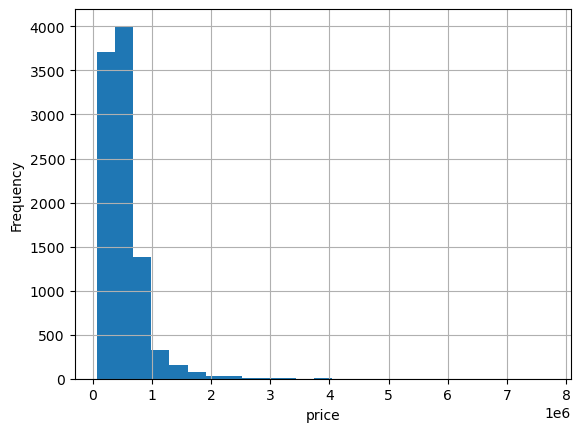

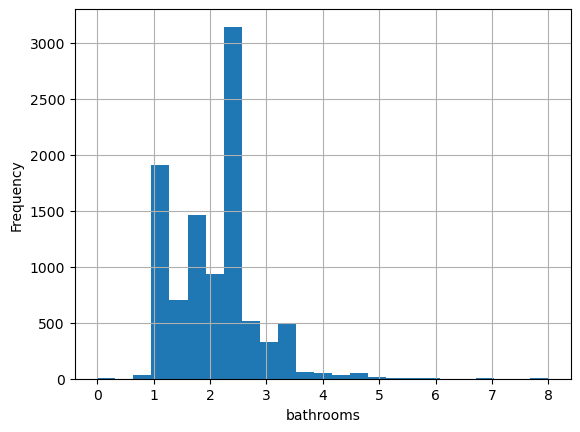

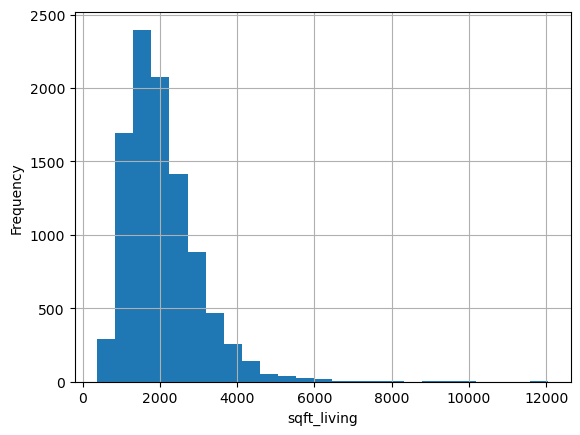

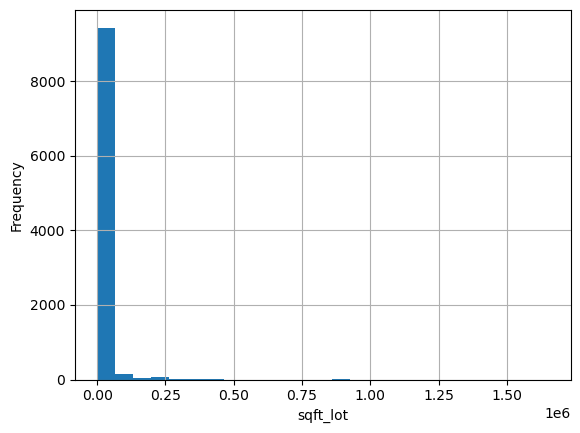

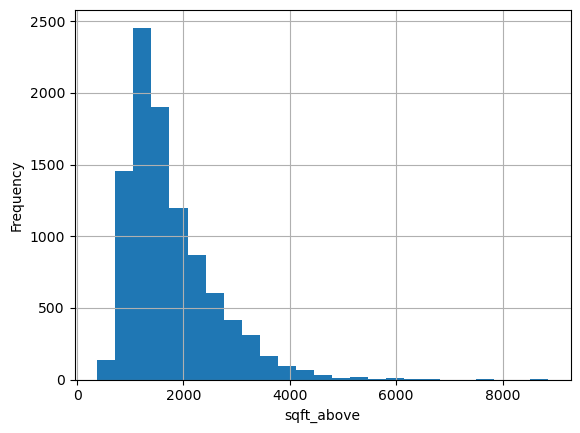

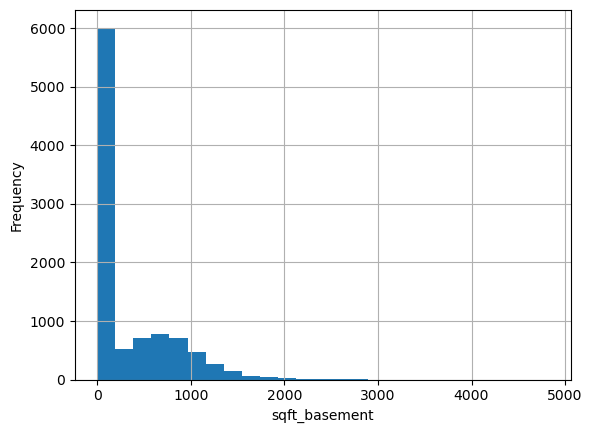

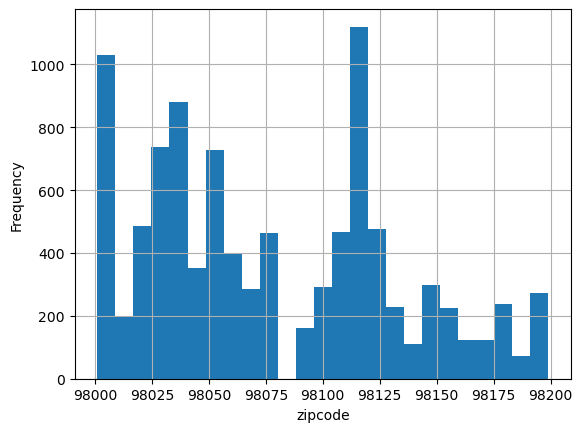

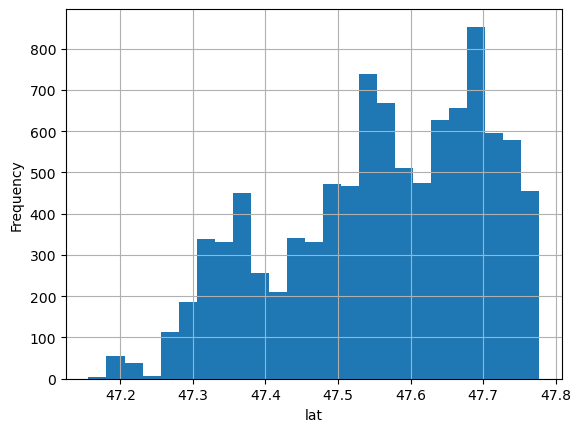

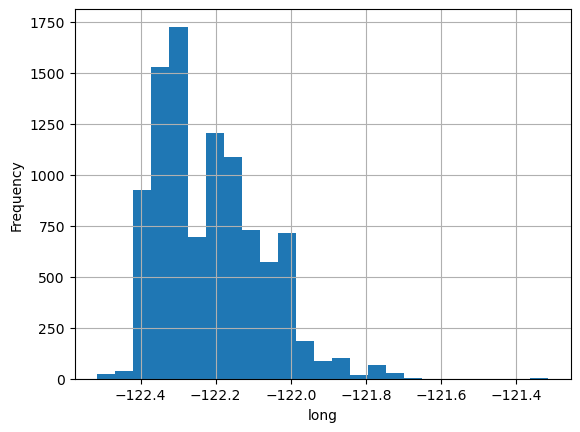

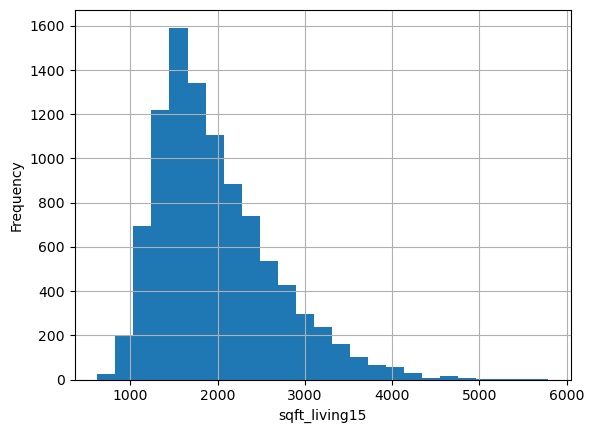

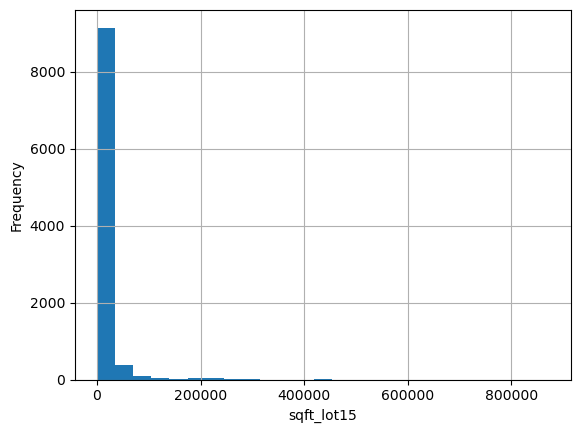

In [54]:
for feature in continous_feature:
    data=df.copy()               #copying data into another dataset for plotting so as to keep the original data.
    data[feature].hist(bins=25)         #plotting histogram for each continous variable in the feature list
    plt.xlabel(feature)                 #displaying the x and the y labels
    plt.ylabel("Frequency")
    plt.show()

Some of the features have normal distribution and some of them are skewed. If data is skewed we transform it into log normal distribution.

We plot the bar plots to study the relationship of discrete variables with price.

In [55]:
df[discrete_feature].head()

,bedrooms,floors,waterfront,view,condition,grade
0,3,1.0,0,0,3,7
1,3,2.0,0,0,3,7
2,2,1.0,0,0,3,6
3,4,1.0,0,0,5,7
4,3,1.0,0,0,3,8


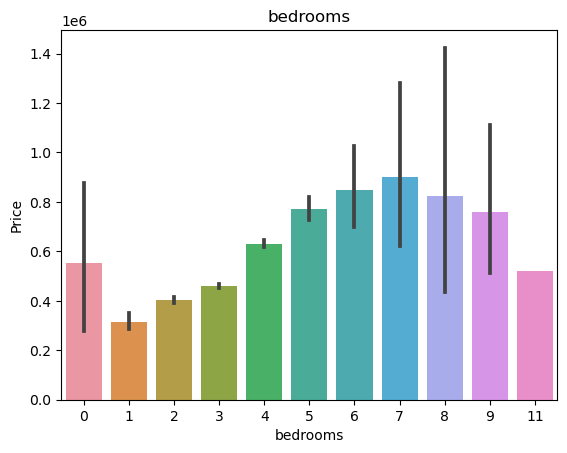

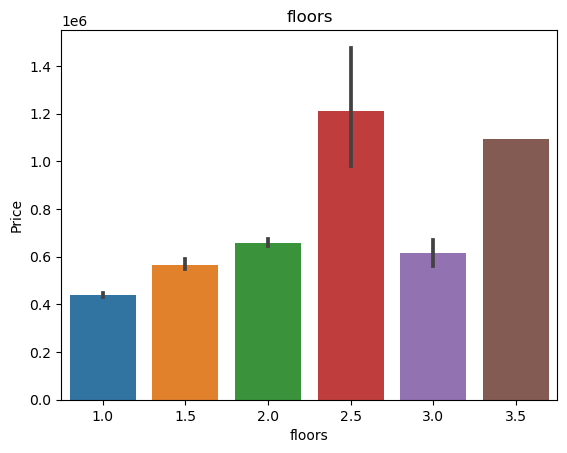

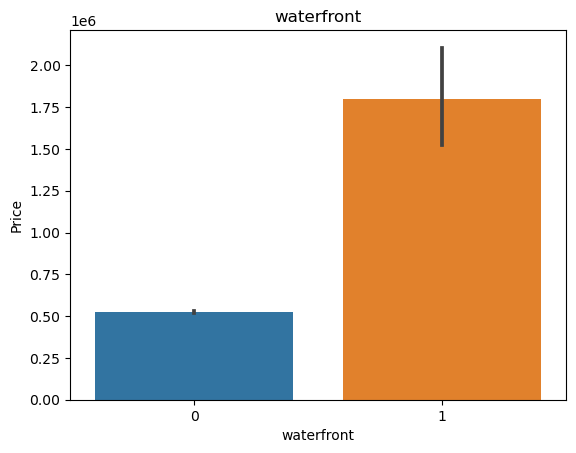

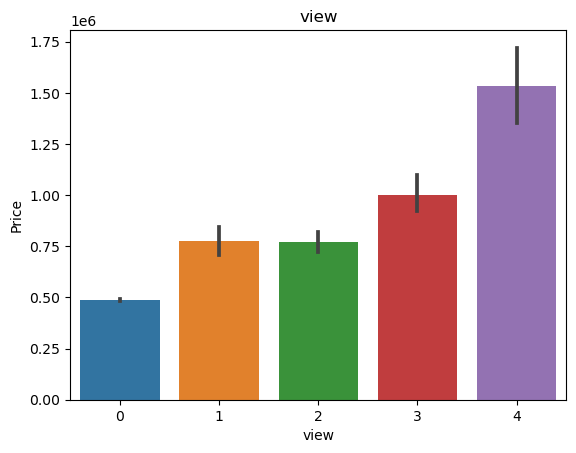

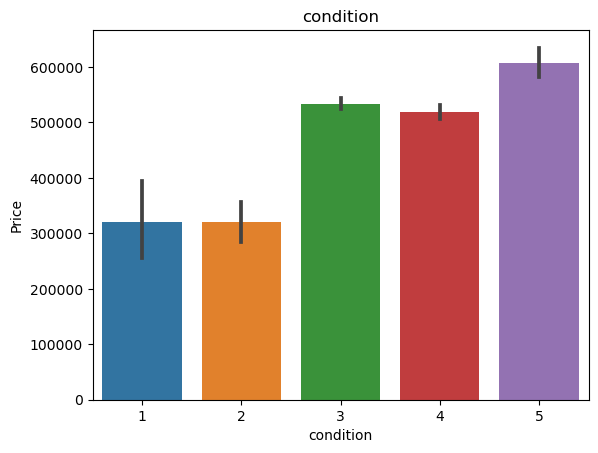

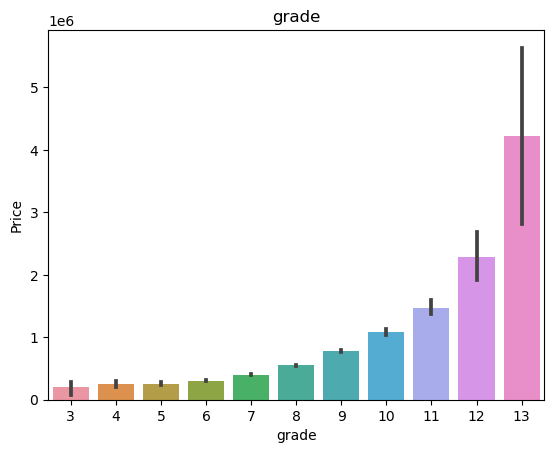

In [56]:
# Finding relationship between discrete feature and price

for feature in discrete_feature:        #plotting bar plota for all the variables in the feature list
    sns.barplot(x = feature , y = 'price' , data = df )  
    
    plt.xlabel(feature)                 #displaying the x and the y labels
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

Here the relationship between grade and price is exponential

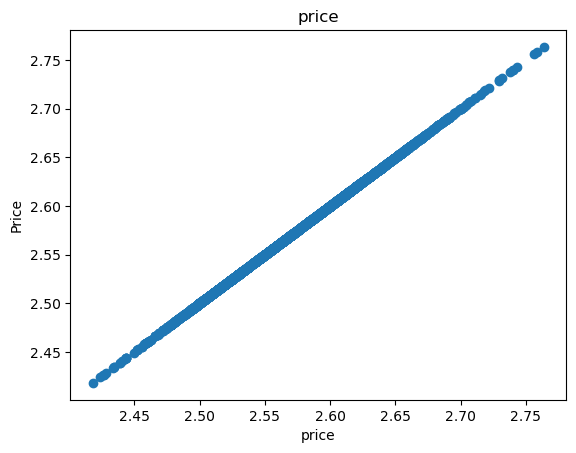

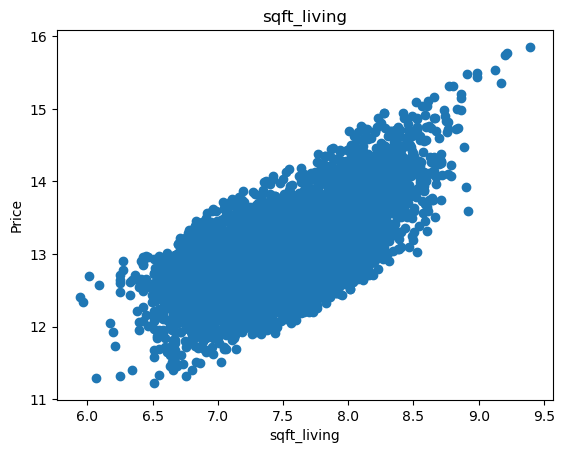

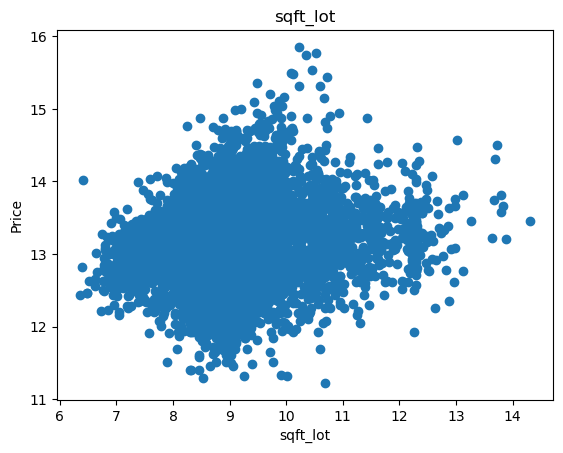

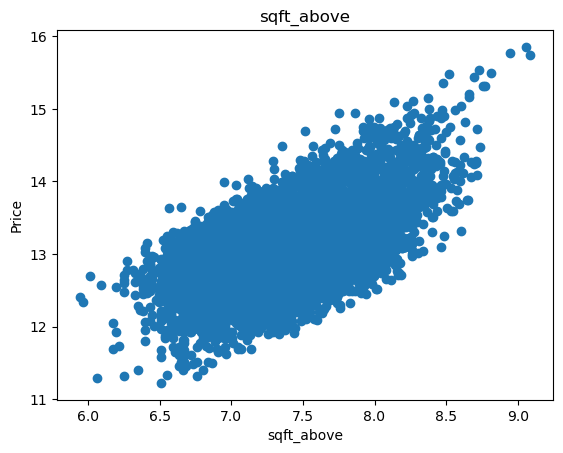

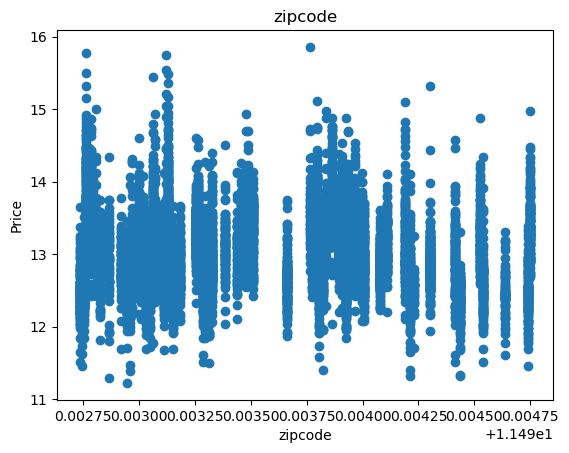

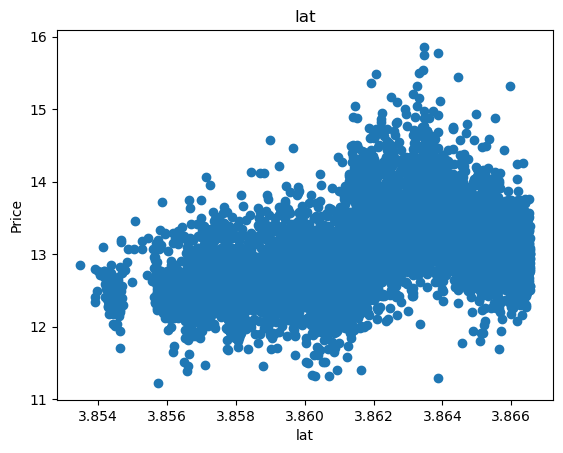

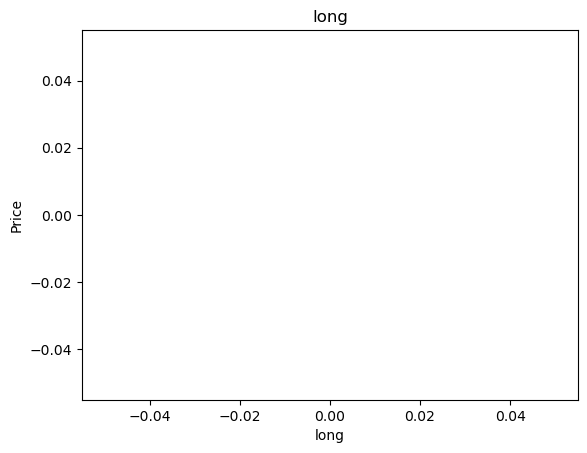

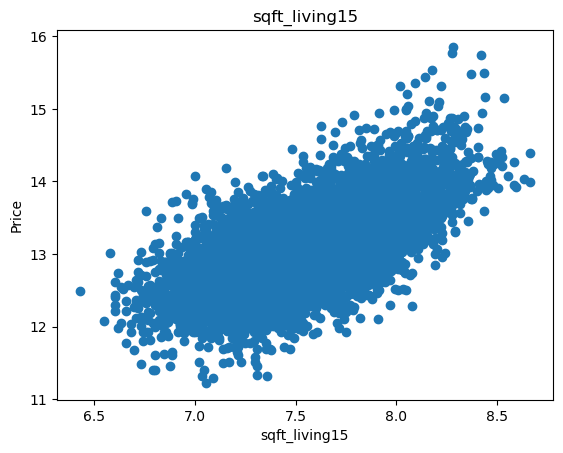

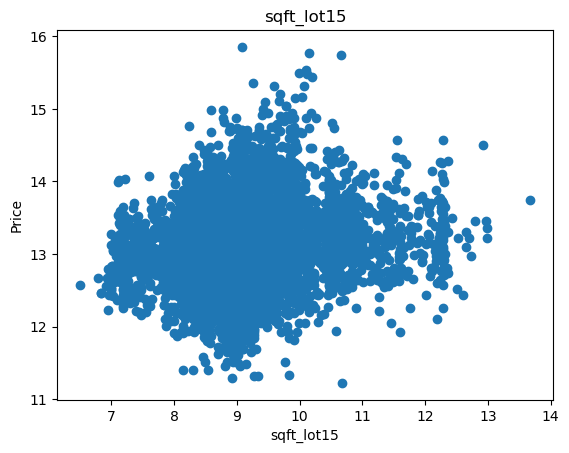

In [57]:
# will be using log transformation
#plotting the scatter plots to study the relationship between the price and the features.
#this will help us in understanding how price is dependent on a variable and also deciding the predictors.
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['price'] = np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Here we can see that all the features have monotonic relationship with Price. And we can also see the have a positive correlation. As sqft_living increases the sales price of the house also increases, and same is for rest of the features.

### Outliers

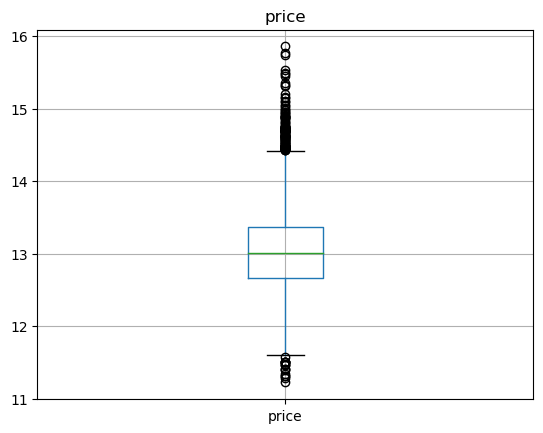

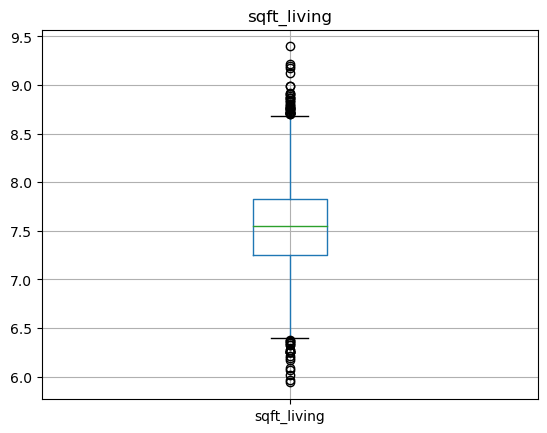

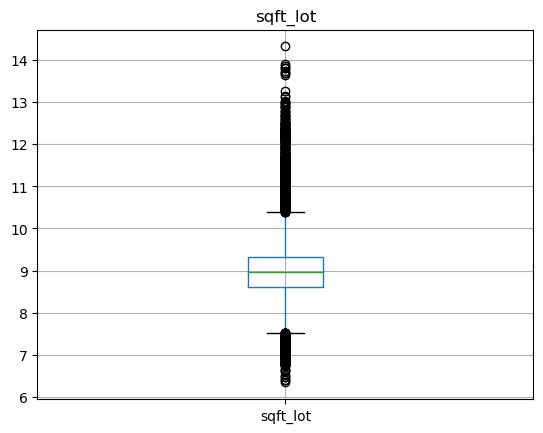

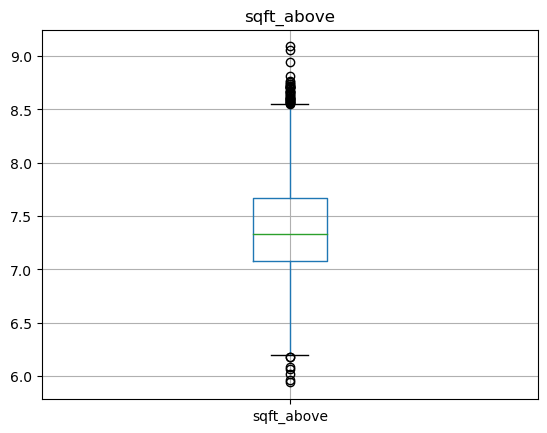

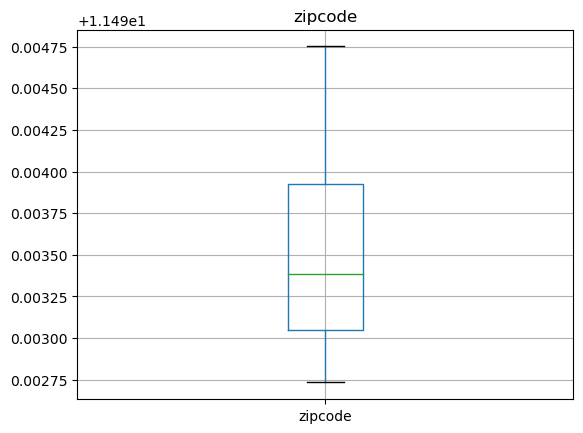

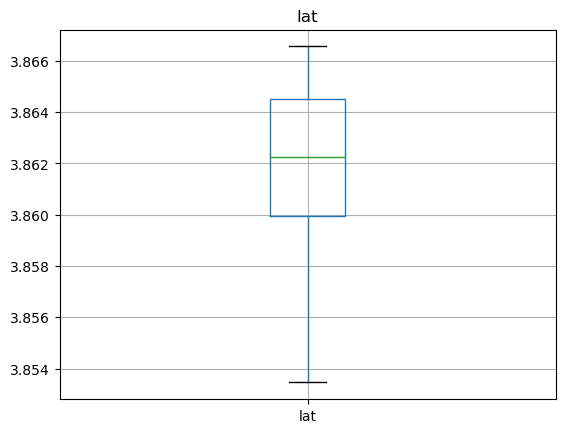

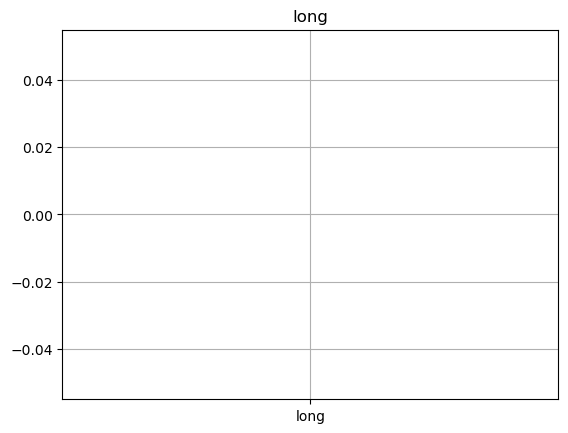

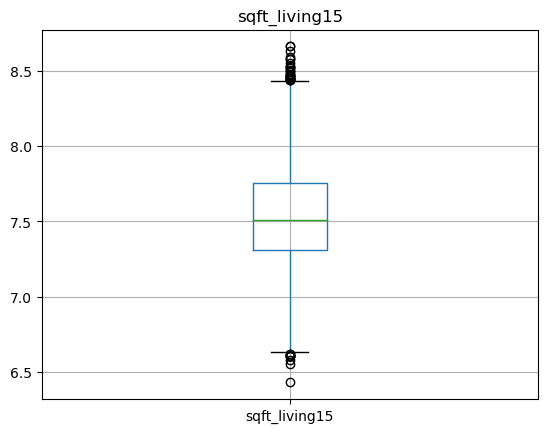

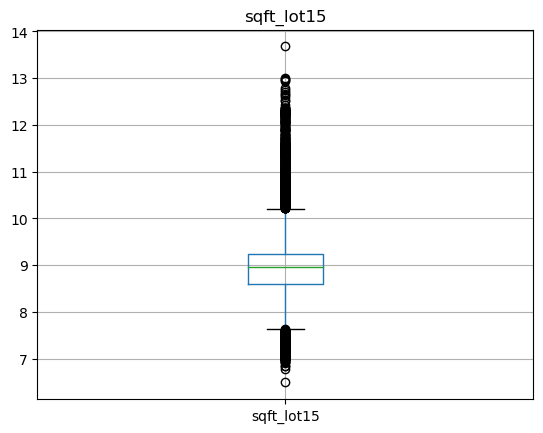

In [58]:
#plotting the box plots of features in the dataset to check for outliers
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        #plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Here we can see a lot of Outliers in the data

### Categorical Variables

In [59]:
categorical_feature = [feature for feature in df.columns if data[feature].dtypes=='object']
categorical_feature

['date']

In [60]:
df[categorical_feature].head()

,date
0,2014-10-13 00:00:00
1,2014-12-09 00:00:00
2,2015-02-25 00:00:00
3,2014-12-09 00:00:00
4,2015-02-18 00:00:00


In [62]:
for feature in categorical_feature:
    print(feature,len(df[feature].unique()))       #getting no.of unique categorical features

date 351


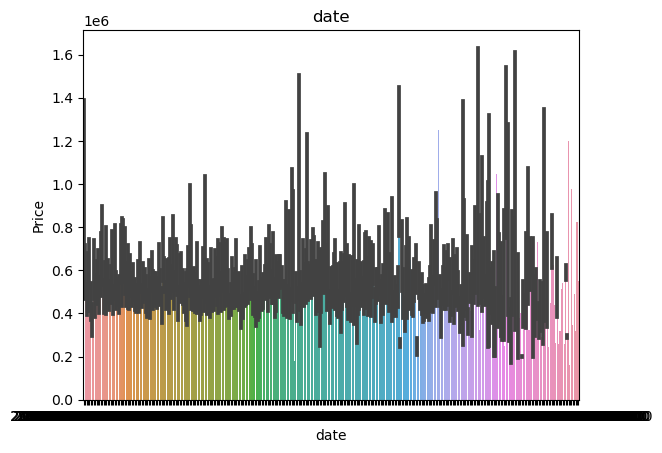

In [63]:
# Finding out relationship between categorical variable and Price
for feature in categorical_feature:
    data=df.copy()
    sns.barplot(x = feature , y = 'price' , data = data )
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

### Conclusions From EDA

We do not have any missing values in our dataset. 

We see that if the house is recently renovated the price of house is high

Plotted histogram to check skewness for continous numerical variables. Observed that features have normal distribution and some others are skewed.If data is skewed transform it into log normal distribution.

Plotted bar plots to study the relationship of discrete variables wit hprice. The relationship of grade with price is exponential. Observed that all features have discrete relationship with price. We can also see that they have a positive correlation. As sqft_living increases sales price of house also increases, same is for rest of features also

From EDA process we infer that initial hypothesis and assumptions made by us were incorrect and price of house depends on other factors also other than those taken into consideration during hypothesis

### 2. Correlation Value With best fitting line

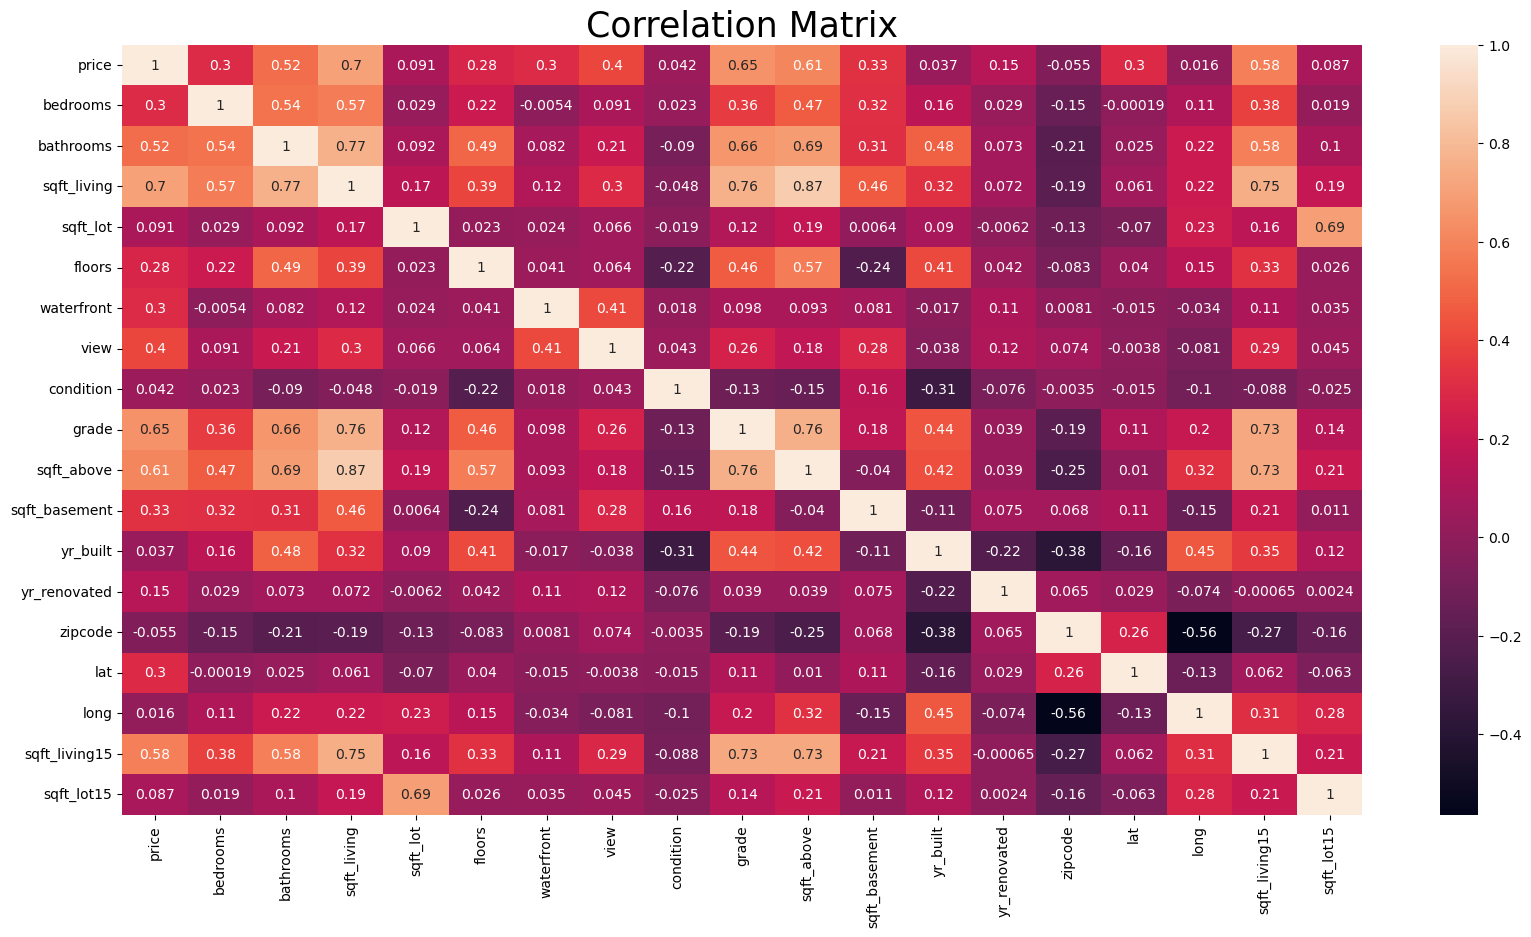

In [64]:
# Finding the correlations between the features using Correlation matrix or heat map

plt.figure(figsize=(20,10))
plt.title("Correlation Matrix",fontsize = 25)

sns.heatmap(df.corr(),annot=True)
plt.show()

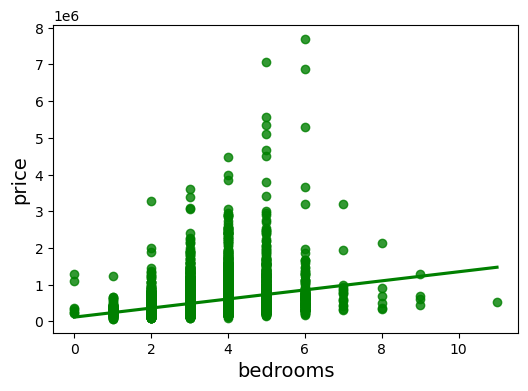

Correlation value between bedrooms and price is  0.29821379696486633 



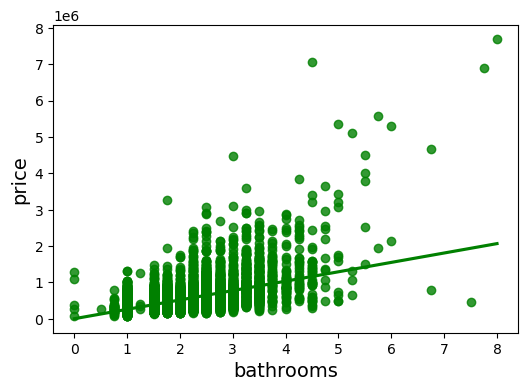

Correlation value between bathrooms and price is  0.5224165219828745 



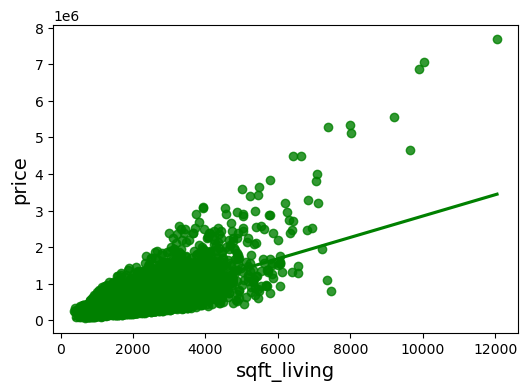

Correlation value between sqft_living and price is  0.7029241824839061 



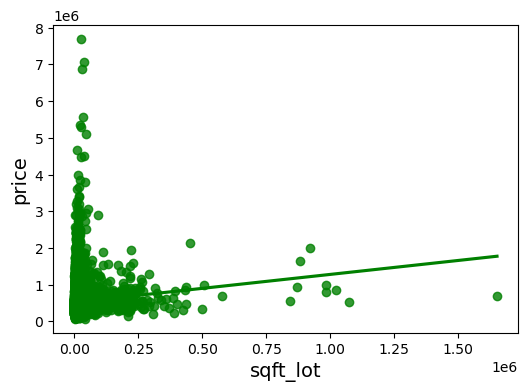

Correlation value between sqft_lot and price is  0.09126028850966098 



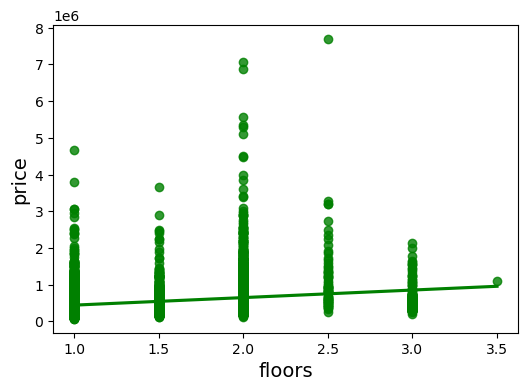

Correlation value between floors and price is  0.27703824560594464 



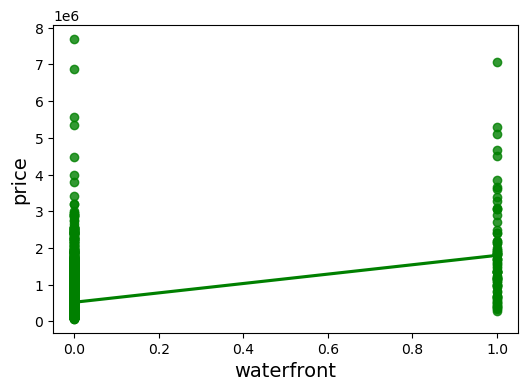

Correlation value between waterfront and price is  0.30019745345837356 



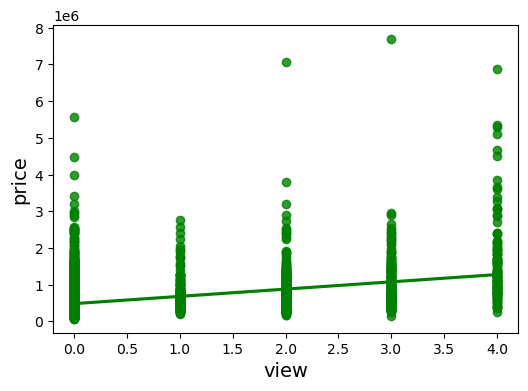

Correlation value between view and price is  0.4007762138029352 



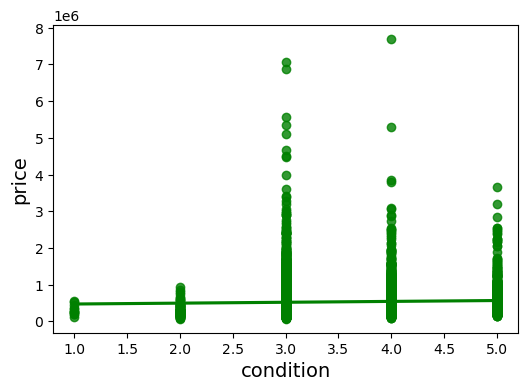

Correlation value between condition and price is  0.04171971480921173 



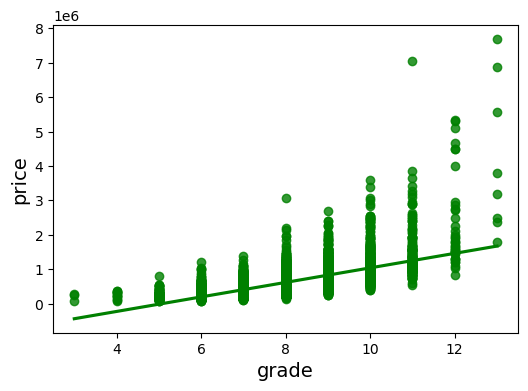

Correlation value between grade and price is  0.6513256953446848 



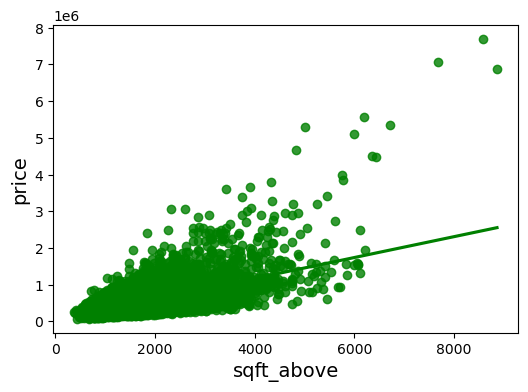

Correlation value between sqft_above and price is  0.6091483500436758 



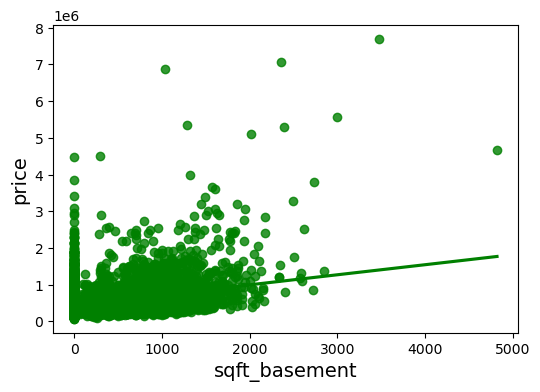

Correlation value between sqft_basement and price is  0.3260689549976026 



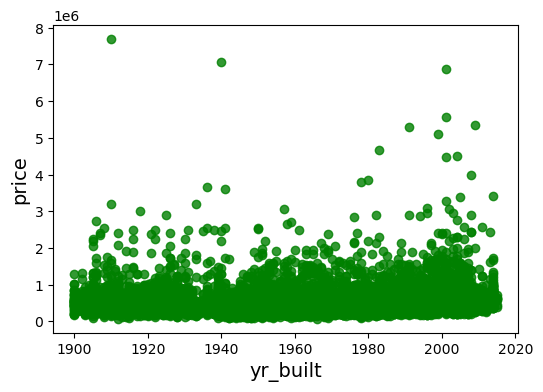

Correlation value between yr_built and price is  0.03712854956066652 



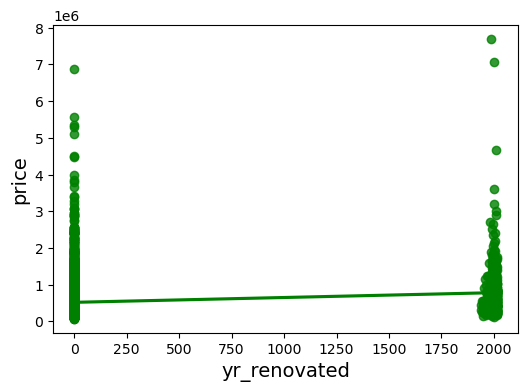

Correlation value between yr_renovated and price is  0.14511477778120999 



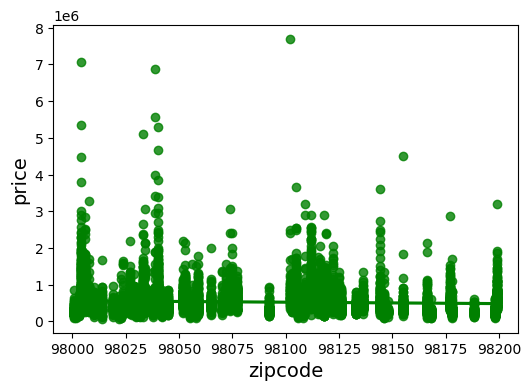

Correlation value between zipcode and price is  -0.05513188687740635 



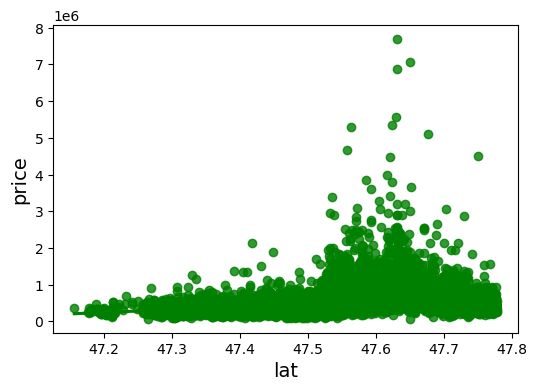

Correlation value between lat and price is  0.2955644461833483 



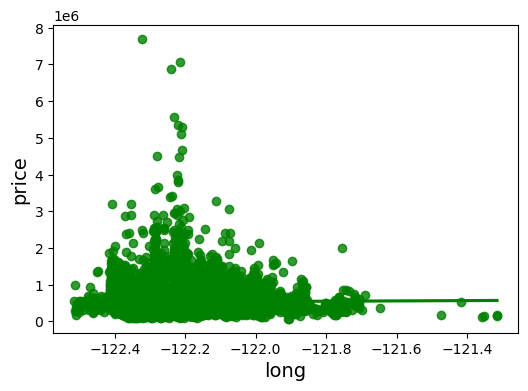

Correlation value between long and price is  0.01568036678462438 



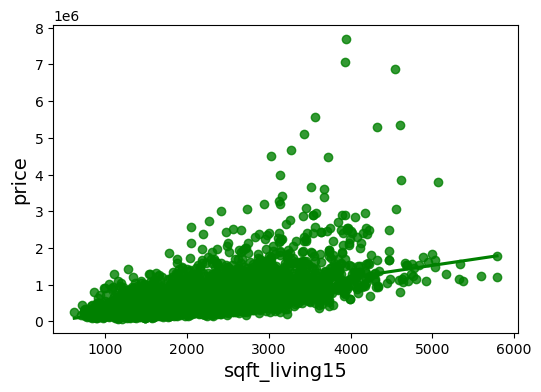

Correlation value between sqft_living15 and price is  0.5830769416921936 



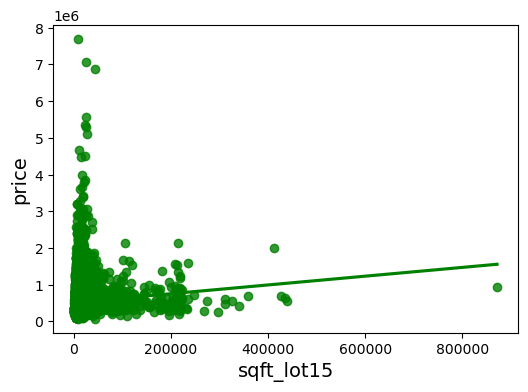

Correlation value between sqft_lot15 and price is  0.08695480687408741 



In [65]:
data0 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
for column in data0:
    x = data0[column]
    y = data["price"]
    if column == "price":
        continue
    else:
        plt.figure(figsize = (6,4))
        sns.regplot(x = x,
        y = y, 
        ci = None,
        data = data,color = 'green')
        plt.xlabel(column,fontsize = 14)
        plt.ylabel("price", fontsize = 14)
        plt.show()
        correlation = y.corr(x)
        print("Correlation value between "+column+" and price is ",correlation,"\n")

### Conclusion from Correlation

from the above observations we can conclude that the variables "sqft_living","grade",."sqft_above","sqft_living15 and bathrooms are have shown affect on price compared to rest of the variables.

"sqft_living", "grade" and "sqft_above" strongly positive correlated with price.

"bedrooms", "bathrooms", "sqft_living15 and "view"and "sqft_basement" are moderately positive correlated with price.

"year_built", "year_renovated", "sqft_lot,floors", "waterfront", "condition" and "sqft_lot15" weakly positive correlated with price.

### 3. Fitting Linear Regression Model

#### i) Simple Linear Regression

Creating a simple Linear Regression model where we our fixing our target variable to price and through a for loop we are iterating through all the columns in the dataset and finding out the cross validation score for R-square,RMSE and MAE metrics.

In [88]:
data=df.copy()

In [69]:
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13 00:00:00,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09 00:00:00,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [76]:
SLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(2,np.shape(data.columns)[0]):    #iterating through all columns of dataset except id,date and price.
    scores1 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    SLR_list.append([data.columns[i],scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])   #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
SLR_Result = pd.DataFrame(SLR_list, columns = ["Predictor","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
SLR_Result = SLR_Result.sort_values("R2")       #sorting a dataframe by R2 column
SLR_Result 

,Predictor,R2,RMSE,MAE
15,long,-0.000926,377019.901604,232883.318222
11,yr_built,0.000225,376809.593657,233162.269685
7,condition,0.000516,376736.274956,232488.766093
13,zipcode,0.001960,376480.454014,232884.265678
17,sqft_lot15,0.006844,375615.326044,231906.600655
3,sqft_lot,0.007404,375522.489634,231593.119452
12,yr_renovated,0.018706,373199.284718,230970.137067
4,floors,0.075534,362326.780848,220387.713922
5,waterfront,0.081357,360404.890035,227718.218057
0,bedrooms,0.087599,359937.957707,221296.314545


Plotting the Horizontal bar plot for R-square value that we got.

In [77]:
px.bar(y=SLR_Result['Predictor'],x=SLR_Result['R2'],labels={'y':'Predictor','x':'R2'})

We can see that "sqft_living","grade","sqft_above","sqft_living15","bathrooms","view" give good value for R**2 when considered individually

It is surprising to note that bedroom has smaller R**@ value than bathrooms

Creating a new Dataframe which consist of predictors in decreasing order of R-Square value in their respective simple regression model.

In [78]:
SLR_list = list(SLR_Result.iloc[:,0])  #slicing the predictor column from SLR_Result dataframe
SLR_list.append('price')               #appending the price to SLR_List    
SLR_list.reverse()                     #reversing the list elements
df_1 = data.loc[:,SLR_list]            #creating a dataframe with SLR_List elements as columns
df_1

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,lat,bedrooms,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,zipcode,condition,yr_built,long
0,221900,1180,7,1180,1340,1.00,0,0,47.5112,3,0,1.0,0,5650,5650,98178,3,1955,-122.257
1,538000,2570,7,2170,1690,2.25,0,400,47.7210,3,0,2.0,1991,7242,7639,98125,3,1951,-122.319
2,180000,770,6,770,2720,1.00,0,0,47.7379,2,0,1.0,0,10000,8062,98028,3,1933,-122.233
3,604000,1960,7,1050,1360,3.00,0,910,47.5208,4,0,1.0,0,5000,5000,98136,5,1965,-122.393
4,510000,1680,8,1680,1800,2.00,0,0,47.6168,3,0,1.0,0,8080,7503,98074,3,1987,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,349000,1700,7,1120,1560,1.75,0,580,47.4801,4,0,1.0,0,7800,7800,98059,5,1981,-122.158
9756,374950,1980,8,1980,2300,2.50,0,0,47.4038,4,0,2.0,0,12062,7902,98031,3,1992,-122.167
9757,306000,1160,7,1160,1870,2.00,0,0,47.7279,3,0,1.0,0,7217,9104,98034,3,1969,-122.227
9758,416000,1980,7,990,1520,1.75,0,990,47.6226,4,0,1.0,0,7840,8400,98008,4,1961,-122.115


### ii) Multiple Linear Regression Model

Creating a Multiple Linear Regression model where we our fixing our target variable to price and through a for loop we are adding a new predictor in each iteration and finding out the cross validation score for R-square,RMSE and MAE metrics. We are making a DataFrame which consists of predictors used and the cv score metrics.

In [79]:
MLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(2,np.shape(df_1.columns)[0]+1):  #iterating through all columns of dataset df_1 except price
    scores1 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    MLR_list.append([list(df_1.columns[1:i]),scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])  #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
MLR_Result = pd.DataFrame(MLR_list, columns = ["Predictor","R2","RMSE","MAE"])    #conerting the list to pandas dataframe
MLR_Result

,Predictor,R2,RMSE,MAE
0,[sqft_living],0.489309,268736.401795,175557.084855
1,"[sqft_living, grade]",0.521675,260235.497195,168012.425278
2,"[sqft_living, grade, sqft_above]",0.525202,259262.358916,166429.449006
3,"[sqft_living, grade, sqft_above, sqft_living15]",0.525889,259131.189847,166112.232472
4,"[sqft_living, grade, sqft_above, sqft_living15...",0.528438,258399.933203,164805.613916
5,"[sqft_living, grade, sqft_above, sqft_living15...",0.560947,249241.789846,159310.722726
6,"[sqft_living, grade, sqft_above, sqft_living15...",0.560975,249233.487443,159311.216206
7,"[sqft_living, grade, sqft_above, sqft_living15...",0.620675,232017.550444,141552.528255
8,"[sqft_living, grade, sqft_above, sqft_living15...",0.624830,230639.024692,140732.697780
9,"[sqft_living, grade, sqft_above, sqft_living15...",0.645206,223902.777645,137944.184530


### 4-A Feature Transformation

We are choosing two features(grade and sqft_living) having highest SLR R-Square and applying exponential transformation to those features to optimize our model.

In [80]:
r2_list = []                                   #making a list to store R-square values
r2_max = 0                                     #varible to contain the highest R-square value
k=2                                            #number of predictors
n=len(data)/10                                 #because 10 folds cv
for i in np.arange(0,4,0.25):                  #iterating through exponent value of grade
    for j in np.arange(0,3,0.25):              #iterating through exponent value of sqft_living        
        x=pd.DataFrame({'grade':data.grade**i,'sqft_living':data.sqft_living**j})     #using grade and sqft_living as they have the highest correlation
        scores1 = cross_val_score(regr,x,pd.DataFrame(data.price),cv=10,scoring='r2') #calculating the cv score with R-square as metric
        r2_list.append(scores1.mean())                                                #appending the mean of cvscores to the list
        if r2_max < scores1.mean():                                           
            r2_max = scores1.mean()
            r2_adj=1-(1-r2_max)*(n-1)/(n-k-1)  #calculating adjusted R-square value
            p = (i,j,scores1.mean(),r2_adj) 
p

(3.0, 2.5, 0.6174322141912069, 0.6166458466972524)

Using grade and sqft_living as predictors and applying feature transformation technique on them. For grade and sqft_living we have applied exponential transformations and selected the optimal values from the above code.

In [81]:
x=pd.DataFrame({'grade':data.grade**3.25,'sqft_living':data.sqft_living**2.5})  #the predictors 
regr = linear_model.LinearRegression()  #initializing the linear regression model
scores1 = cross_val_score(regr,x,pd.DataFrame(data.price),cv=10,scoring='r2')                          #calculating the cv score with R-square as metric
scores2 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6173627533554953, 230823.22031153884, 153912.1199456292)

Adding some more predictors to the previously transformed predictors we get better R-square and adjusted R-square values.

In [82]:
x=pd.DataFrame({'grade':data.grade**3.25,'sqft_living':data.sqft_living**2.5,'sqft_above':data.sqft_above,'sqft_living15':data.sqft_living15,'bathrooms':data.bathrooms,'view':data.view,'sqft_basement':data.sqft_basement,'lat':data.lat,'bedrooms':data.bedrooms,'waterfront':data.waterfront,'floors':data.floors,'yr_renovated':data.yr_renovated,'sqft_lot':data.sqft_lot,'sqft_lot15':data.sqft_lot15,'yr_built':data.yr_built,'zipcode':data.zipcode,'condition':data.condition,'long':data.long})
regr = linear_model.LinearRegression()                    #initializing the linear regression model
scores1 = cross_val_score(regr,x,pd.DataFrame(data.price),cv=10,scoring='r2')                          #calculating the cv score with R-square as metric
scores2 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.7597591256698534, 182901.4817195776, 116007.102642504)

### 4-B Feature Generation

Calculating the age of the house and adding it as a new column to the original dataframe.

In [89]:
yr_list=data['date'].str[:4]                #slicing the first 4 characters from date column to get the year of listing
yr_list=yr_list.astype(int)                 #converting the sliced year to integer type
house_age=yr_list-df_1['yr_built']          #house age calculation listing date-built date
df_1['house_age']=pd.DataFrame(house_age)   #adding the age of house column to dataframe

We will use the new feature house_age as a predictor in our model and we get a slightly increased R-Square value.

In [90]:
x=pd.DataFrame({'grade':data.grade**3.25,'sqft_living':data.sqft_living**2.5,'house_age':df_1.house_age,'sqft_above':data.sqft_above,'sqft_living15':data.sqft_living15,'bathrooms':data.bathrooms,'view':data.view,'sqft_basement':data.sqft_basement,'lat':data.lat,'bedrooms':data.bedrooms,'waterfront':data.waterfront,'floors':data.floors,'yr_renovated':data.yr_renovated,'sqft_lot':data.sqft_lot,'sqft_lot15':data.sqft_lot15,'yr_built':data.yr_built,'zipcode':data.zipcode,'condition':data.condition,'long':data.long})
regr = linear_model.LinearRegression()
scores1 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.7609067073611838, 182445.08004590234, 115646.46473799611)

### 5) Backward Elimination Method to select best model

In [95]:
MLR_Result

,Predictor,R2,RMSE,MAE
0,[sqft_living],0.489309,268736.401795,175557.084855
1,"[sqft_living, grade]",0.521675,260235.497195,168012.425278
2,"[sqft_living, grade, sqft_above]",0.525202,259262.358916,166429.449006
3,"[sqft_living, grade, sqft_above, sqft_living15]",0.525889,259131.189847,166112.232472
4,"[sqft_living, grade, sqft_above, sqft_living15...",0.528438,258399.933203,164805.613916
5,"[sqft_living, grade, sqft_above, sqft_living15...",0.560947,249241.789846,159310.722726
6,"[sqft_living, grade, sqft_above, sqft_living15...",0.560975,249233.487443,159311.216206
7,"[sqft_living, grade, sqft_above, sqft_living15...",0.620675,232017.550444,141552.528255
8,"[sqft_living, grade, sqft_above, sqft_living15...",0.624830,230639.024692,140732.697780
9,"[sqft_living, grade, sqft_above, sqft_living15...",0.645206,223902.777645,137944.184530


Creating a Dictionary showing improvement due to adding new parameter in each iteration of Multiple Linear Regression.

In [96]:
diff = {}  #Creating a dictionary
for i in range(1,np.shape(MLR_Result)[0]):
    #difference of subsequent R-square,RMSE and MAE values
    diff[MLR_Result.iloc[len(MLR_Result)-1,0][i]] = {"R2":MLR_Result.iloc[i,1]-MLR_Result.iloc[i-1,1],"MSE":MLR_Result.iloc[i,2]-MLR_Result.iloc[i-1,2],"RMSE":MLR_Result.iloc[i,3]-MLR_Result.iloc[i-1,3]}
Back_Eli = pd.DataFrame(diff).T
Back_Eli

,R2,MSE,RMSE
grade,0.032367,-8500.904600,-7544.659577
sqft_above,0.003527,-973.138279,-1582.976272
sqft_living15,0.000687,-131.169069,-317.216534
bathrooms,0.002549,-731.256643,-1306.618556
view,0.032509,-9158.143357,-5494.891190
sqft_basement,0.000028,-8.302402,0.493481
lat,0.059700,-17215.937000,-17758.687952
bedrooms,0.004155,-1378.525751,-819.830475
waterfront,0.020376,-6736.247048,-2788.513250
floors,0.000872,-286.918521,249.619242


Storing the list of columns for which the difference is greater than 0.002 and the others are omitted from the model.

In [97]:
l = list(Back_Eli[Back_Eli.R2>0.002].T.columns)   
l.append('sqft_living')
l

['grade',
 'sqft_above',
 'bathrooms',
 'view',
 'lat',
 'bedrooms',
 'waterfront',
 'yr_renovated',
 'condition',
 'yr_built',
 'long',
 'sqft_living']

In [98]:
scores1 = cross_val_score(regr,df_1.loc[:,l],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,df_1.loc[:,l],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,df_1.loc[:,l],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6863217180718573, 210637.45449118596, 128307.68954799976)

In [99]:
x = df_1.loc[:,l]                  #slicing all features which made more than 0.002 change in R2 score individually 
X_train,X_test,y_train,y_test=train_test_split(x,df_1.price,test_size=0.3,random_state=100) #splitting data into train and test part
model = stm.OLS(y_train,X_train)   #initializing the linear regression model
fii = model.fit()                  #fitting the model
p_values = fii.summary2().tables[1]['P>|t|'] #from summary table of model selecting the p-values
p_values

grade           4.959625e-157
sqft_above       5.998726e-06
bathrooms        1.632711e-16
view             3.954547e-36
lat             2.295965e-150
bedrooms         1.148945e-29
waterfront      3.723099e-115
yr_renovated     1.475665e-01
condition        1.037310e-07
yr_built        1.387081e-187
long             5.498100e-75
sqft_living     1.878880e-106
Name: P>|t|, dtype: float64

As seen from above output, yr_renovated doesn't have significant p-value(<0.05) so we will remove it from our list of predictors

In [100]:
l2=list(l)                  #making a duplicate list
l2.remove('yr_renovated')   #removing yr_renovated element
scores1 = cross_val_score(regr,df_1.loc[:,l2],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,df_1.loc[:,l2],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,df_1.loc[:,l2],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6860642582969725, 210720.20392025044, 128447.29129139773)

In [101]:
x = df_1.loc[:,l2]                 #slicing all features which made more than 0.002 change in R2 score individually 
X_train,X_test,y_train,y_test=train_test_split(x,df_1.price,test_size=0.3,random_state=100) #splitting data into train and test part
model = stm.OLS(y_train,X_train)   #initializing the linear regression model
fii = model.fit()                  #fitting the model
p_values = fii.summary2().tables[1]['P>|t|'] #from summary table of model selecting the p-values
p_values

grade          1.394380e-157
sqft_above      5.135876e-06
bathrooms       1.303759e-17
view            2.419063e-36
lat            4.931809e-150
bedrooms        6.568541e-30
waterfront     4.635737e-117
condition       2.544212e-07
yr_built       3.076078e-210
long            1.385102e-74
sqft_living    3.819163e-106
Name: P>|t|, dtype: float64

In [102]:
l1=list(l2)
l1.append('house_age')
scores1 = cross_val_score(regr,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6869409568893052, 210416.3633349281, 128195.46131256437)

In [103]:
x = df_1.loc[:,l1]                 #slicing all features which made more than 0.002 change in R2 score individually 
X_train,X_test,y_train,y_test=train_test_split(x,df_1.price,test_size=0.3,random_state=100) #splitting data into train and test part
model = stm.OLS(y_train,X_train)   #initializing the linear regression model
fii = model.fit()                  #fitting the model
p_values = fii.summary2().tables[1]['P>|t|'] #from summary table of model selecting the p-values
p_values

grade          4.821568e-142
sqft_above      1.885697e-09
bathrooms       3.005079e-14
view            1.318036e-35
lat            4.514574e-164
bedrooms        1.631564e-29
waterfront     6.406211e-118
condition       3.585136e-09
yr_built        2.760350e-27
long            4.088086e-01
sqft_living    1.456003e-106
house_age       7.552406e-16
Name: P>|t|, dtype: float64

### 6) Model Testing

Calculating the age of house for test data and adding it to new column house_age

In [116]:
test = pd.read_excel("house_price_test.xlsx") #reading the test data
y_actual = test.loc[:,'price']               #actual value of target variable

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1130 non-null   int64  
 1   date           1130 non-null   object 
 2   price          1130 non-null   int64  
 3   bedrooms       1130 non-null   int64  
 4   bathrooms      1130 non-null   float64
 5   sqft_living    1130 non-null   int64  
 6   sqft_lot       1130 non-null   int64  
 7   floors         1130 non-null   float64
 8   waterfront     1130 non-null   int64  
 9   view           1130 non-null   int64  
 10  condition      1130 non-null   int64  
 11  grade          1130 non-null   int64  
 12  sqft_above     1130 non-null   int64  
 13  sqft_basement  1130 non-null   int64  
 14  yr_built       1130 non-null   int64  
 15  yr_renovated   1130 non-null   int64  
 16  zipcode        1130 non-null   int64  
 17  lat            1130 non-null   float64
 18  long    

In [118]:
yr_list1=test['date'].str[:4]                #slicing the first 4 characters from date column to get the year of listing
yr_list1=yr_list1.astype(int)                #converting the sliced year to integer type
house_age=yr_list1-test['yr_built']          #house age calculation listing date-built date
test['house_age']=pd.DataFrame(house_age)    #adding the age of house column to dataframe

In [119]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,9136103027,20140608T000000,445000,2,1.00,1440,3225,1.0,0,0,...,960,480,1915,0,98103,47.6653,-122.338,1160,3630,99
1,3432501415,20140714T000000,265000,3,1.75,1170,8148,1.0,0,0,...,1170,0,1952,0,98155,47.7479,-122.318,1200,8147,62
2,3432501415,20141111T000000,399000,3,1.75,1170,8148,1.0,0,0,...,1170,0,1952,0,98155,47.7479,-122.318,1200,8147,62
3,1026069044,20141010T000000,785000,4,2.25,3200,53357,2.0,0,0,...,3200,0,1972,0,98077,47.7550,-122.035,2650,54014,42
4,1152600220,20140623T000000,831500,5,2.50,4470,35124,2.5,0,0,...,4470,0,1984,0,98072,47.7377,-122.084,4050,34118,30


#### A) Testing the Simple Linear Regression model using predictors 'sqft_living'

In [120]:
regr = linear_model.LinearRegression()            #initializing the linear regression model
regr.fit(pd.DataFrame(df_1.loc[:,'sqft_living']),df_1.price)    #fitting the model
y_pred1 = regr.predict(pd.DataFrame(test.loc[:,'sqft_living']))
RMSE1 = np.sqrt(np.mean((y_pred1-y_actual)**2))   #calculating RMSE 
r2_score1 = r2_score(y_actual, y_pred1)           #calculating R-square value
r2_score1, RMSE1

(0.4803797754486998, 272619.91647096386)

####  B) Testing the Multiple Linear Regression model using predictors all predictors except id and date

In [121]:
l3 = list(df_1.iloc[:,1:-1].columns)
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(df_1.loc[:,l3],df_1.price)              #fitting the model
y_pred2 = regr.predict(test.loc[:,l3])
RMSE2 = np.sqrt(np.mean((y_pred2-y_actual)**2))  #calculating RMSE 
r2_score2 = r2_score(y_actual, y_pred2)          #calculating R-square value
r2_score2, RMSE2

(0.6902908384883706, 210470.66995660297)

### C) Testing the Multiple Linear Regression model with feature transformation on grade and sqft_living.

In [122]:
x=pd.DataFrame({'grade':df_1.grade**3.25,'sqft_living':df_1.sqft_living**2.5,'sqft_above':df_1.sqft_above,'sqft_living15':df_1.sqft_living15,'bathrooms':df_1.bathrooms,'view':df_1.view,'sqft_basement':df_1.sqft_basement,'lat':df_1.lat,'bedrooms':df_1.bedrooms,'waterfront':df_1.waterfront,'floors':df_1.floors,'yr_renovated':df_1.yr_renovated,'sqft_lot':df_1.sqft_lot,'sqft_lot15':df_1.sqft_lot15,'yr_built':df_1.yr_built,'zipcode':df_1.zipcode,'condition':df_1.condition,'long':df_1.long})
x_test=pd.DataFrame({'grade':test.grade**3.25,'sqft_living':test.sqft_living**2.5,'sqft_above':test.sqft_above,'sqft_living15':test.sqft_living15,'bathrooms':test.bathrooms,'view':test.view,'sqft_basement':test.sqft_basement,'lat':test.lat,'bedrooms':test.bedrooms,'waterfront':test.waterfront,'floors':test.floors,'yr_renovated':test.yr_renovated,'sqft_lot':test.sqft_lot,'sqft_lot15':test.sqft_lot15,'yr_built':test.yr_built,'zipcode':test.zipcode,'condition':test.condition,'long':test.long})
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(x,df_1.price)                           #fitting the model
y_pred3 = regr.predict(x_test)
RMSE3 = np.sqrt(np.mean((y_pred3-y_actual)**2))  #calculating RMSE 
r2_score3 = r2_score(y_actual, y_pred3)          #calculating R-square value
r2_score3, RMSE3

(0.6984264647011634, 207687.8884301302)

#### D) Testing the Multiple Linear Regression model using all predictors and 'house_age' feature addtion

In [123]:
df_1.columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'lat', 'bedrooms', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'zipcode',
       'condition', 'yr_built', 'long', 'house_age'],
      dtype='object')

In [124]:
x = pd.DataFrame({'grade':df_1.grade**3.25,'sqft_living':df_1.sqft_living**2.5,'sqft_above':df_1.sqft_above,'sqft_living15':df_1.sqft_living15,'bathrooms':df_1.bathrooms,'view':df_1.view,'sqft_basement':df_1.sqft_basement,'lat':df_1.lat,'bedrooms':df_1.bedrooms,'waterfront':df_1.waterfront,'floors':df_1.floors,'yr_renovated':df_1.yr_renovated,'sqft_lot':df_1.sqft_lot,'sqft_lot15':df_1.sqft_lot15,'yr_built':df_1.yr_built,'zipcode':df_1.zipcode,'condition':df_1.condition,'long':df_1.long,'house_age':df_1.house_age})
x_test = pd.DataFrame({'grade':test.grade**3.25,'sqft_living':test.sqft_living**2.5,'sqft_above':test.sqft_above,'sqft_living15':test.sqft_living15,'bathrooms':test.bathrooms,'view':test.view,'sqft_basement':test.sqft_basement,'lat':test.lat,'bedrooms':test.bedrooms,'waterfront':test.waterfront,'floors':test.floors,'yr_renovated':test.yr_renovated,'sqft_lot':test.sqft_lot,'sqft_lot15':test.sqft_lot15,'yr_built':test.yr_built,'zipcode':test.zipcode,'condition':test.condition,'long':test.long,'house_age':test.house_age})
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(x,df_1.price)                           #fitting the model
y_pred4 = regr.predict(x_test)
RMSE4 = np.sqrt(np.mean((y_pred4-y_actual)**2))  #calculating RMSE 
r2_score4 = r2_score(y_actual, y_pred4)          #calculating R-square value
r2_score4, RMSE4

(0.7005185513182013, 206966.24480895736)

#### E) Testing the Multiple Linear Regression model using predictors 'grade', 'sqft_above', 'bathrooms', 'view', 'lat', 'waterfront', 'yr_built', 'zipcode', 'long', 'sqft_living'. Obtained using backward elimination method.

In [125]:
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(df_1.loc[:,l2],df_1.price)              #fitting the model
y_pred5 = regr.predict(test.loc[:,l2])
RMSE5 = np.sqrt(np.mean((y_pred5-y_actual)**2))  #calculating RMSE 
r2_score5 = r2_score(y_actual, y_pred5)          #calculating R-square value
r2_score5, RMSE5

(0.6912619892085192, 210140.4258882835)

In [126]:
# Creating a pandas data frame to compare all error metrics of all the models.
Results = pd.DataFrame({'Model':['R-Square','RMSE'], 'SLR':[r2_score1,RMSE1], 'MLR (18 Features)':[r2_score2,RMSE2], 'Feature transformed MLR':[r2_score3,RMSE3],'Feature Addition MLR':[r2_score4,RMSE4],'Backward Elimination MLR:':[r2_score5,RMSE5]} )
Results


,Model,SLR,MLR (18 Features),Feature transformed MLR,Feature Addition MLR,Backward Elimination MLR:
0,R-Square,0.480380,0.690291,0.698426,0.700519,0.691262
1,RMSE,272619.916471,210470.669957,207687.888430,206966.244809,210140.425888


### Conclusion

When we test our models using test dataset, the Simple linear Regression model has very poor R-square value of 0.499975, which improves a lot when we adopt to MLR(18 features) we get better value for R-square 0.687685, we optimize this MLR using backward elimination method and get the R-Square value of 0.679962 while reducing number of features from 18 to 10. When we use feature transformation and feature addition in our MLR model, we get slightly better R-square value of 0.707214 & 0.706978 respectively